In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("mall_customers.csv")

print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].map({"Male":0,"Female":1})

# Remove ID column if exists
if "CustomerID" in df.columns:
    df.drop(columns=["CustomerID"], inplace=True)

# Use only numeric columns
X = df.select_dtypes(include=['int64','float64'])

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

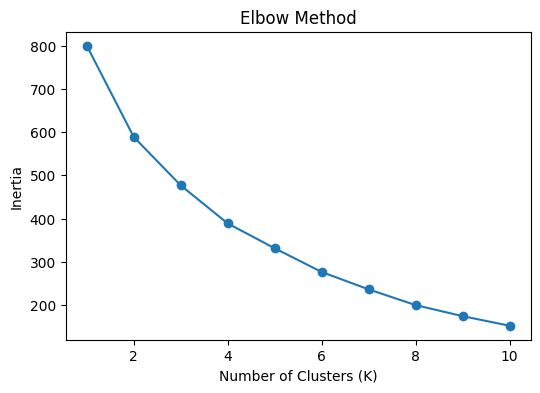

In [5]:
inertia = []

K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

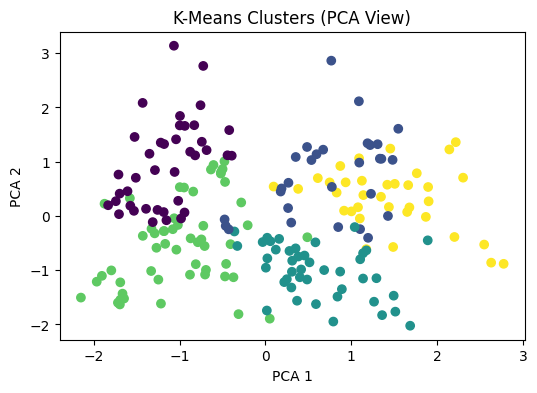

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("K-Means Clusters (PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [9]:
score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", score)


Silhouette Score: 0.3040600988258827
